In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, StrMethodFormatter

from copy import deepcopy

from tess_lc_rise import *

import warnings 

warnings.filterwarnings("ignore")

%matplotlib widget

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig_width_pt = 244.0  # Get this from LaTeX using \the\columnwidth
text_width_pt = 508.0 # Get this from LaTeX using \the\textwidth

# plt.rc('font', size=21)
# plt.rc('xtick', labelsize=21)
# plt.rc('ytick', labelsize=21)

inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt*1.5 # width in inches
fig_width_full = text_width_pt*inches_per_pt  # 17
fig_height =fig_width*golden_mean # height in inches
fig_size = [fig_width,fig_height] #(9,5.5) #(9, 4.5)

In [3]:
def residuals(theta, mjd, flux, flux_err):
    
    theta[3] = 58804.03
    
    mjds = mjd[mjd >= theta[3]]
    fluxes = flux[mjd >= theta[3]]
    flux_errs = flux_err[mjd >= theta[3]]
    
    model = power_law(mjds, *theta)
    
    resid = np.nansum((abs(model - fluxes))**2 / flux_errs**2 ) / (len(fluxes) - len(theta))
    if (resid == 0) | (np.isnan(resid)):
        return np.nan
    else:
        return resid

In [4]:
final_resids_df, opt_val, add_uncert, min_ind, lc, blc, popt, pcov = main(min_error = 1)

Binning data in 6 hour slots
Exposure time is 30 mins
Number of bins: 92


In [5]:
final_resids_df.iloc[final_resids_df['residuals'].idxmin()]

index          599.000000
residuals        0.989856
a                2.735702
n                1.411153
c               -0.793158
d            58804.031328
d_a              0.315534
d_n              0.037753
d_c              0.796633
d_d              0.290162
Name: 44, dtype: float64

In [6]:
opt_val

58804.0482511612

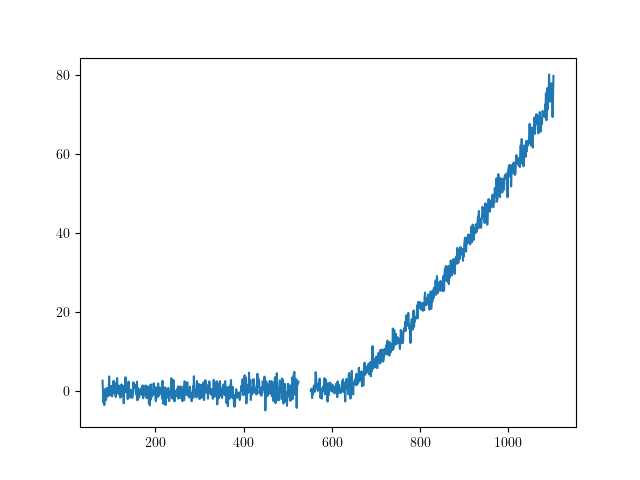

In [7]:
plt.figure()
plt.plot(lc[1])
plt.show()

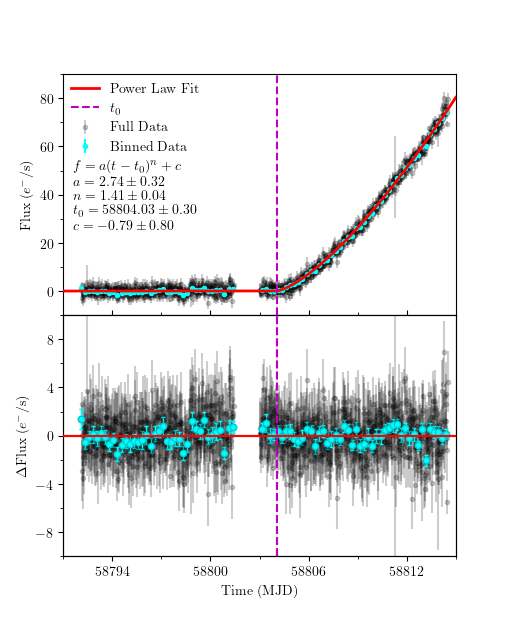

In [8]:
full_data_colour = 'k'
binned_data_colour = 'cyan'
power_law_colour = 'r'


model_mjds = np.linspace(og_lc[0][0], 58815, 1001)

# fig, axs = plt.subplots(1, 2, figsize=[fig_width * 2, fig_height])
# plt.subplots_adjust(wspace=0.25, hspace=0.0)

fig, axs = plt.subplots(2, 1, figsize=[fig_width, fig_height*2])
plt.subplots_adjust(wspace=0.07, hspace=0.0)

axs[0].errorbar(lc[0], lc[1], lc[2], color = full_data_colour, alpha = 0.2, fmt = '.', label = 'Full Data')
axs[0].errorbar(blc[0], blc[1], blc[2], color = binned_data_colour, alpha = 1, fmt = '.', label = 'Binned Data')

plaw = power_law(model_mjds, *popt) - popt[2]
plaw[np.isnan(plaw)] = 0

plaw_n0 = power_law(lc[0], *popt) - popt[2]
plaw_n0[np.isnan(plaw_n0)] = 0

plaw_b0 = power_law(blc[0], *popt) - popt[2]
plaw_b0[np.isnan(plaw_b0)] = 0

axs[0].plot(model_mjds, plaw, color = power_law_colour, linewidth = 2, label = 'Power Law Fit', zorder = 20)
axs[0].axvline(opt_val, color = 'm', linestyle = '--', alpha = 1, zorder = 30, label = r"$t_0$")

axs[1].errorbar(lc[0], lc[1] - plaw_n0, lc[2],  
                color= full_data_colour, alpha=0.1, fmt = '.')
axs[1].errorbar(blc[0], blc[1] - plaw_b0, blc[2], 
                color=binned_data_colour, fmt = '.', markeredgecolor = 'darkturquoise',
                capsize = 1.5, elinewidth=1, markersize = 9, label = 'Binned Data')
axs[1].axhline(0, color=power_law_colour, zorder = 20)
axs[1].axvline(opt_val, color = 'm', linestyle = '--', alpha = 1, zorder = 30, label = r"$t_0$")


ax2 = axs[1].twiny()
ax2.errorbar(lc[0], lc[1] - plaw_n0, lc[2],  
                color= full_data_colour, alpha=0.1, fmt = '.')
ax2.errorbar(blc[0], blc[1] - plaw_b0, blc[2], 
                color=binned_data_colour, fmt = '.', markeredgecolor = 'darkturquoise', 
                capsize = 1.5, elinewidth=1, markersize = 9, label = 'Binned Data')
ax2.axhline(0, color=power_law_colour, zorder = 20)
ax2.axvline(opt_val, color = 'm', linestyle = '--', alpha = 1, zorder = 30, label = r"$t_0$")

ax2.set_xticklabels([])

axs[0].yaxis.set_minor_locator(MultipleLocator(10))
axs[0].yaxis.set_major_locator(MultipleLocator(20))

axs[0].xaxis.set_minor_locator(MultipleLocator(3))
axs[0].xaxis.set_major_locator(MultipleLocator(6))

axs[1].yaxis.set_minor_locator(MultipleLocator(2))
axs[1].yaxis.set_major_locator(MultipleLocator(4))

axs[1].xaxis.set_minor_locator(MultipleLocator(3))
axs[1].xaxis.set_major_locator(MultipleLocator(6))

ax2.yaxis.set_minor_locator(MultipleLocator(2))
ax2.yaxis.set_major_locator(MultipleLocator(4))

ax2.xaxis.set_minor_locator(MultipleLocator(3))
ax2.xaxis.set_major_locator(MultipleLocator(6))

axs[0].set_ylabel(r'Flux ($e^{-}/{\rm s}$)')

axs[0].set_xlim(58791, 58815)
axs[1].set_xlim(58791, 58815)
ax2.set_ylim(-10, 10)
ax2.set_xlim(58791, 58815)
axs[0].set_ylim(-10, 90)
axs[1].set_ylim(-10, 10)

axs[1].set_xlabel('Time (MJD)')
# ax2.set_ylabel(r'$\Delta$Flux ($e^{-}/{\rm s}$)')
axs[1].set_ylabel(r'$\Delta$Flux ($e^{-}/{\rm s}$)')
axs[0].legend(loc = 'upper left', bbox_to_anchor = (-0.0125, 1.015), ncol = 1, frameon=False)

# x_pos = 0.5*( axs[0].get_xlim()[1] + axs[0].get_xlim()[0]) # 90% of the x-axis limit
# y_pos = 0.5 * ( axs[0].get_ylim()[1] + axs[0].get_ylim()[0])  # 50% of the y-axis limit

# axs[1].text(58813, 52, r"$f = a (t-t_0)^{n} + c$",  ha='left', va='center')
# axs[1].text(58813, 46, f"$a={popt[0]:.2f} \pm {np.sqrt(np.diag(pcov))[0]:.2f}$",  ha='left', va='center')
# axs[1].text(58813, 40, f"$n={popt[1]:.2f} \pm {np.sqrt(np.diag(pcov))[1]:.2f}$",  ha='left', va='center')
# axs[1].text(58813, 33.5, f"$t_0={popt[3]:.2f} \pm {np.sqrt(np.diag(pcov)[3] + add_uncert**2):.2f}$",  ha='left', va='center')
# axs[1].text(58813, 27.7, f"$c={popt[2]:.2f} \pm {np.sqrt(np.diag(pcov))[2]:.2f}$",  ha='left', va='center')

axs[0].text(58791.6, 52, r"$f = a (t-t_0)^{n} + c$",  ha='left', va='center')
axs[0].text(58791.6, 46, f"$a={popt[0]:.2f} \pm {np.sqrt(np.diag(pcov))[0]:.2f}$",  ha='left', va='center')
axs[0].text(58791.6, 40, f"$n={popt[1]:.2f} \pm {np.sqrt(np.diag(pcov))[1]:.2f}$",  ha='left', va='center')
axs[0].text(58791.6, 33.5, f"$t_0={popt[3]:.2f} \pm {np.sqrt(np.diag(pcov)[3] + add_uncert**2):.2f}$",  ha='left', va='center')
axs[0].text(58791.6, 27.7, f"$c={popt[2]:.2f} \pm {np.sqrt(np.diag(pcov))[2]:.2f}$",  ha='left', va='center')

plt.savefig('../../Plots/tess_residual_rise.pdf', format = 'pdf', bbox_inches = 'tight')
# plt.savefig('../../Plots/tess_presentation_residual_rise.pdf', format = 'pdf', bbox_inches = 'tight')
# plt.savefig('/Users/zgl12/Documents/Conferences/TESS_2024/residual_rise.png', dpi = 900, bbox_inches = 'tight')
plt.show()

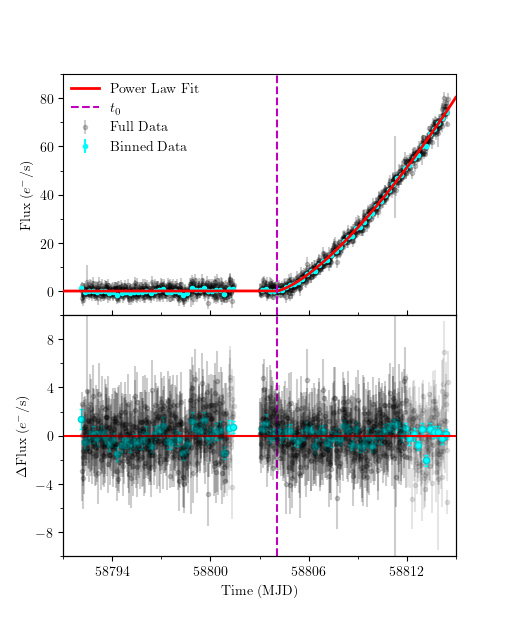

In [9]:
full_data_colour = 'k'
binned_data_colour = 'cyan'
power_law_colour = 'r'


model_mjds = np.linspace(og_lc[0][0], 58815, 1001)

# fig, axs = plt.subplots(1, 2, figsize=[fig_width * 2, fig_height])
# plt.subplots_adjust(wspace=0.25, hspace=0.0)

fig, axs = plt.subplots(2, 1, figsize=[fig_width, fig_height*2])
plt.subplots_adjust(wspace=0.07, hspace=0.0)

axs[0].errorbar(lc[0], lc[1], lc[2], color = full_data_colour, alpha = 0.2, fmt = '.', label = 'Full Data')
axs[0].errorbar(blc[0], blc[1], blc[2], color = binned_data_colour, alpha = 1, fmt = '.', label = 'Binned Data')

plaw = power_law(model_mjds, *popt) - popt[2]
plaw[np.isnan(plaw)] = 0

plaw_n0 = power_law(lc[0], *popt) - popt[2]
plaw_n0[np.isnan(plaw_n0)] = 0

plaw_b0 = power_law(blc[0], *popt) - popt[2]
plaw_b0[np.isnan(plaw_b0)] = 0

axs[0].plot(model_mjds, plaw, color = power_law_colour, linewidth = 2, label = 'Power Law Fit', zorder = 20)
axs[0].axvline(opt_val, color = 'm', linestyle = '--', alpha = 1, zorder = 30, label = r"$t_0$")

axs[1].errorbar(lc[0], lc[1] - plaw_n0, lc[2],  
                color= full_data_colour, alpha=0.1, fmt = '.')
axs[1].errorbar(blc[0], blc[1] - plaw_b0, blc[2], 
                color=binned_data_colour, fmt = '.', markeredgecolor = 'darkturquoise',
                capsize = 1.5, elinewidth=1, markersize = 9, label = 'Binned Data')
axs[1].axhline(0, color=power_law_colour, zorder = 20)
axs[1].axvline(opt_val, color = 'm', linestyle = '--', alpha = 1, zorder = 30, label = r"$t_0$")


plz_ind = np.where((lc[0] < 58801) & (lc[0] > 58792) | (lc[0] > 58802) & (lc[0] < 58812))[0]

ax2 = axs[1].twiny()
ax2.errorbar(lc[0][plz_ind], lc[1][plz_ind] - plaw_n0[plz_ind], lc[2][plz_ind],  
                color= full_data_colour, alpha=0.1, fmt = '.')

# df = df[(df['MJD'] < 58801) & (df['MJD'] > 58792) | (df['MJD'] > 58802) & (df['MJD'] < 58812)]


# ax2.errorbar(blc[0], blc[1] - plaw_b0, blc[2], 
#                 color=binned_data_colour, fmt = '.', markeredgecolor = 'darkturquoise', 
#                 capsize = 1.5, elinewidth=1, markersize = 9, label = 'Binned Data')
# ax2.axhline(0, color=power_law_colour, zorder = 20)
# ax2.axvline(opt_val, color = 'm', linestyle = '--', alpha = 1, zorder = 30, label = r"$t_0$")

ax2.set_xticklabels([])

axs[0].yaxis.set_minor_locator(MultipleLocator(10))
axs[0].yaxis.set_major_locator(MultipleLocator(20))

axs[0].xaxis.set_minor_locator(MultipleLocator(3))
axs[0].xaxis.set_major_locator(MultipleLocator(6))

axs[1].yaxis.set_minor_locator(MultipleLocator(2))
axs[1].yaxis.set_major_locator(MultipleLocator(4))

axs[1].xaxis.set_minor_locator(MultipleLocator(3))
axs[1].xaxis.set_major_locator(MultipleLocator(6))

ax2.yaxis.set_minor_locator(MultipleLocator(2))
ax2.yaxis.set_major_locator(MultipleLocator(4))

ax2.xaxis.set_minor_locator(MultipleLocator(3))
ax2.xaxis.set_major_locator(MultipleLocator(6))

axs[0].set_ylabel(r'Flux ($e^{-}/{\rm s}$)')

axs[0].set_xlim(58791, 58815)
axs[1].set_xlim(58791, 58815)
ax2.set_ylim(-10, 10)
ax2.set_xlim(58791, 58815)
axs[0].set_ylim(-10, 90)
axs[1].set_ylim(-10, 10)

axs[1].set_xlabel('Time (MJD)')
# ax2.set_ylabel(r'$\Delta$Flux ($e^{-}/{\rm s}$)')
axs[1].set_ylabel(r'$\Delta$Flux ($e^{-}/{\rm s}$)')
axs[0].legend(loc = 'upper left', bbox_to_anchor = (-0.0125, 1.015), ncol = 1, frameon=False)

# x_pos = 0.5*( axs[0].get_xlim()[1] + axs[0].get_xlim()[0]) # 90% of the x-axis limit
# y_pos = 0.5 * ( axs[0].get_ylim()[1] + axs[0].get_ylim()[0])  # 50% of the y-axis limit

# axs[1].text(58813, 52, r"$f = a (t-t_0)^{n} + c$",  ha='left', va='center')
# axs[1].text(58813, 46, f"$a={popt[0]:.2f} \pm {np.sqrt(np.diag(pcov))[0]:.2f}$",  ha='left', va='center')
# axs[1].text(58813, 40, f"$n={popt[1]:.2f} \pm {np.sqrt(np.diag(pcov))[1]:.2f}$",  ha='left', va='center')
# axs[1].text(58813, 33.5, f"$t_0={popt[3]:.2f} \pm {np.sqrt(np.diag(pcov)[3] + add_uncert**2):.2f}$",  ha='left', va='center')
# axs[1].text(58813, 27.7, f"$c={popt[2]:.2f} \pm {np.sqrt(np.diag(pcov))[2]:.2f}$",  ha='left', va='center')

# axs[0].text(58791.6, 52, r"$f = a (t-t_0)^{n} + c$",  ha='left', va='center')
# axs[0].text(58791.6, 46, f"$a={popt[0]:.2f} \pm {np.sqrt(np.diag(pcov))[0]:.2f}$",  ha='left', va='center')
# axs[0].text(58791.6, 40, f"$n={popt[1]:.2f} \pm {np.sqrt(np.diag(pcov))[1]:.2f}$",  ha='left', va='center')
# axs[0].text(58791.6, 33.5, f"$t_0={popt[3]:.2f} \pm {np.sqrt(np.diag(pcov)[3] + add_uncert**2):.2f}$",  ha='left', va='center')
# axs[0].text(58791.6, 27.7, f"$c={popt[2]:.2f} \pm {np.sqrt(np.diag(pcov))[2]:.2f}$",  ha='left', va='center')

# plt.savefig('../../Plots/tess_residual_rise.pdf', format = 'pdf', bbox_inches = 'tight')
# plt.savefig('../../Plots/tess_presentation_residual_rise.pdf', format = 'pdf', bbox_inches = 'tight')
# plt.savefig('/Users/zgl12/Documents/Conferences/TESS_2024/residual_rise.png', dpi = 900, bbox_inches = 'tight')
plt.show()

In [ ]:
def flux_to_jansky(flux, zp = 20.44):
    c = (zp - 8.9) / -2.5
    return flux * 1e6 * 10**c

df = pd.read_csv('/Users/zgl12/Modules/SN2019vxm/Data/tess_sector_18_psf_calib_vxm.csv')
df = df[(df['MJD'] < 58801) & (df['MJD'] > 58792) | (df['MJD'] > 58802) & (df['MJD'] < 58812)]

df = df.reset_index(drop=True)

df['flux'] = lc[1][plz_ind] - plaw_n0[plz_ind]
jy = flux_to_jansky(df['flux'].values, zp = 20.576474800725272)
df['uJy'] = jy
df['ZP'] = 20.576474800725272

df.to_csv('flattened_vxm_18.csv', index = False)


In [ ]:
len(plz_ind)

In [ ]:
def magnitude(flux, zp = 20.023960740994795):
    m = -2.5 * np.log10(flux) + zp
    return m

def magnitude_error(f, df, dzp):
    return np.sqrt((-2.5 / np.log(10) * df/ (f))**2 + dzp**2)

def flux_to_jansky(flux, zp = 20.44):
    c = (zp - 8.9) / -2.5
    return flux * 1e6 * 10**c

def jansky_error(mag, mag_error):
    return np.sqrt((-0.4 * np.log(10) * 10**((8.9 - mag)/2.5))**2 * mag_error**2) * 1e6

In [ ]:
tess_zp_df = pd.read_csv('../../Data/tess_zp.csv')

tess_zp = tess_zp_df[(tess_zp_df['Sector'] == 18) & (tess_zp_df['Method'] == 'psf')]
d_zp = tess_zp['d_ZP'].values[0]

zp = 20.576474800725272

In [ ]:
lc[0], lc[1] - plaw_n0, lc[2]

In [ ]:
saving_df = pd.DataFrame(columns=['MJD', 'uJy', 'duJy', 'm', 'dm', 'd_ZP', 'ZP', 'Method', 'Sector'])

mag = magnitude(lc[1] - plaw_n0, zp = zp)
mag_err = magnitude_error(lc[1] - plaw_n0, lc[2], d_zp)

saving_df['MJD'] = lc[0]
saving_df['uJy'] = flux_to_jansky(lc[1] - plaw_n0, zp = zp)
saving_df['duJy'] = jansky_error(mag, mag_err)
saving_df['m'] = mag
saving_df['dm'] = mag_err
saving_df['d_ZP'] = d_zp
saving_df['ZP'] = zp
saving_df['Method'] = 'psf'
saving_df['Sector'] = 18

savepath = '/Users/zgl12/Python_Scripts/SN2019VXM/TESS_Control_Curves/'
    
saving_df.to_csv(f'{savepath}tess_sector_{18}_{"psf"}_vxm.csv', index=False)

In [ ]:
add_uncert

In [ ]:
df = pd.read_csv('/Users/zgl12/Modules/SN2019vxm/Data/tess_sector_18_psf_calib_vxm.csv')

og_lc = np.row_stack((df.MJD.values, df.flux.values, df.dflux.values))

In [ ]:
df.flux.values

In [ ]:
final_resids_df